In [1]:
import pandas as pd

train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')
submission = pd.read_csv('sample_submission1.csv')

In [2]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
train.target.value_counts()

1    6199
0    3801
Name: target, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

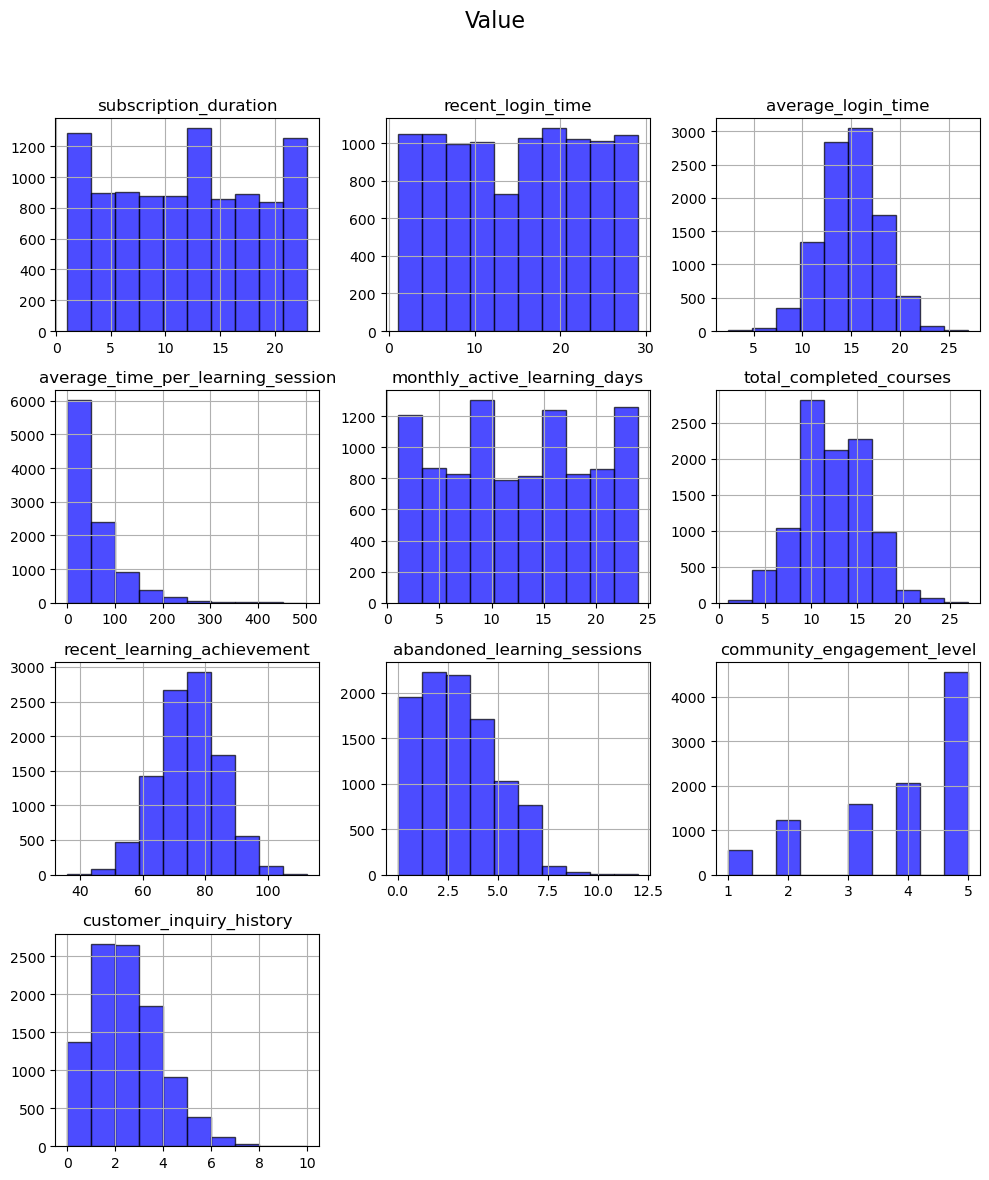

In [6]:
numeric_train = train[['subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'customer_inquiry_history',]]

# 히스토그램 그리기
numeric_train.hist(alpha=0.7, color='blue', edgecolor='k', layout=(4, 3), figsize=(10, 12))

plt.suptitle('Value', fontsize=16)
plt.xlabel('Value')
plt.ylabel('frequency')

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

-feature engineering

In [7]:
# 사용자가 학습에 얼마나 집중하는지를 나타내는 지표.average_time_per_learning_session와 monthly_active_learning_days의 곱으로 계산.
train['learning_intensity'] = train['average_time_per_learning_session'] * train['monthly_active_learning_days']
test['learning_intensity'] = test['average_time_per_learning_session'] * test['monthly_active_learning_days']

In [8]:
#각 학습 세션에 소요된 평균 시간 대비 완료한 총 코스 수.total_completed_courses를 average_time_per_learning_session로 나눔.
train['learning_efficiency'] = train['total_completed_courses'] / train['average_time_per_learning_session']
test['learning_efficiency'] = test['total_completed_courses'] / test['average_time_per_learning_session']

In [9]:
#평균 학습 세션 완료 시간 대비 최근 학습 성취도 recent_learning_achievement를 average_time_per_learning_session으로 나누어 계산.
train['achievement_per_session_time'] = train['recent_learning_achievement'] / (train['average_time_per_learning_session'] + 1)
test['achievement_per_session_time'] = test['recent_learning_achievement'] / (test['average_time_per_learning_session'] + 1)

In [10]:
#설명: 평균 로그인 시간에 대비한 학습 세션의 평균 소요 시간.
#계산: average_time_per_learning_session를 average_login_time으로 나눈 값.
# train 데이터프레임에 learning_session_time_ratio 변수 생성
train['learning_session_time_ratio'] = train['average_time_per_learning_session'] / (train['average_login_time'] + 1)

# test 데이터프레임에 learning_session_time_ratio 변수 생성
test['learning_session_time_ratio'] = test['average_time_per_learning_session'] / (test['average_login_time'] + 1)


In [11]:
# 마지막 구독기간 중 월 학습 기간 대비 완료 코스의 수
# train 데이터프레임에 courses_completed_per_session_revised 변수 생성
train['courses_completed_per_learning_days'] = train['total_completed_courses'] / (train['monthly_active_learning_days'] + 1)

# test 데이터프레임에 courses_completed_per_session_revised 변수 생성
test['courses_completed_per_learning_days'] = test['total_completed_courses'] / (test['monthly_active_learning_days'] + 1)


In [12]:
#설명: 커뮤니티 참여도와 학습 성취도를 서로 조합한 지표.
#계산: community_engagement_level와 recent_learning_achievement를 곱한 값.

# train 데이터프레임에 community_engagement_achievement_interaction 변수 생성
train['community_engagement_achievement_interaction'] = train['community_engagement_level'] * train['recent_learning_achievement']

# test 데이터프레임에 community_engagement_achievement_interaction 변수 생성
test['community_engagement_achievement_interaction'] = test['community_engagement_level'] * test['recent_learning_achievement']


In [13]:
#설명: 최근 구독 기간 동안 완료된 코스 수에 대비한 중단된 세션 수.
#계산: abandoned_learning_sessions를 total_completed_courses으로 나눈 값.
# train 데이터프레임에 abandoned_sessions_per_course_completed 변수 생성
train['abandoned_sessions_per_course_completed'] = train['abandoned_learning_sessions'] / (train['total_completed_courses'] + 1)

# test 데이터프레임에 abandoned_sessions_per_course_completed 변수 생성
test['abandoned_sessions_per_course_completed'] = test['abandoned_learning_sessions'] / (test['total_completed_courses'] + 1)


In [14]:
#설명: 평균 학습 세션에 소요된 시간 대비 중단된 학습 세션의 비율.
#계산: abandoned_learning_sessions를 average_time_per_learning_session으로 나눈 비율.
# train 데이터프레임에 abandoned_sessions_ratio 변수 생성
train['abandoned_sessions_ratio'] = train['abandoned_learning_sessions'] / (train['average_time_per_learning_session'] + 1)

# test 데이터프레임에 abandoned_sessions_ratio 변수 생성
test['abandoned_sessions_ratio'] = test['abandoned_learning_sessions'] / (test['average_time_per_learning_session'] + 1)


In [15]:
train_transfered = train.copy()
test_transfered = test.copy()

In [16]:
test_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,customer_inquiry_history,payment_pattern,learning_intensity,learning_efficiency,achievement_per_session_time,learning_session_time_ratio,courses_completed_per_learning_days,community_engagement_achievement_interaction,abandoned_sessions_per_course_completed,abandoned_sessions_ratio
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,...,2,7,133.897619,2.128492,10.199090,0.578922,0.750000,410.372787,0.187500,0.372798
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,...,4,4,245.833273,0.650848,3.148380,1.701434,1.454545,161.092081,0.235294,0.156352
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,...,1,3,15.368542,11.126625,27.211009,0.087354,1.900000,368.384786,0.250000,1.846643
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,...,1,5,256.696670,0.280487,2.827633,1.487237,0.461538,253.258539,0.000000,0.000000
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,...,1,3,145.015898,0.827495,2.922554,1.403054,1.666667,223.598588,0.062500,0.052282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,...,1,6,1805.020450,0.232684,0.773166,6.982951,1.000000,352.760783,0.181818,0.043835
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,...,3,5,183.704478,0.685884,6.028915,0.761891,0.368421,135.117690,0.250000,0.178479
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,...,1,0,447.629186,0.442330,4.183020,1.128070,0.391304,178.588015,0.500000,0.234227
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,...,2,5,2034.782237,0.063889,0.521950,9.340019,0.714286,411.091949,0.181818,0.012697


-수치형 변수 이상치 제거

In [17]:
def remove_outlier(df, col):
    # Q1과 Q3 계산
    Q1 =df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # IQR 계산
    IQR = Q3 - Q1

    # 이상치의 하한과 상한 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 필터링
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_cols = [
    'subscription_duration', 'recent_login_time',
    'average_login_time', 'average_time_per_learning_session',
    'monthly_active_learning_days', 'total_completed_courses',
    'recent_learning_achievement', 'abandoned_learning_sessions',
    'community_engagement_level', 'customer_inquiry_history', 'learning_intensity', 
    'learning_efficiency', 'achievement_per_session_time','learning_session_time_ratio',
    'courses_completed_per_learning_days','community_engagement_achievement_interaction',
    'abandoned_sessions_per_course_completed','abandoned_sessions_ratio'
]

print('시작 개수:', len(train_transfered))
for col in numeric_cols:
    train_transfered = remove_outlier(train_transfered, col)

train_transfered.reset_index(drop=True, inplace=True)
print('전처리 후 개수:', len(train_transfered))

시작 개수: 10000
전처리 후 개수: 5646


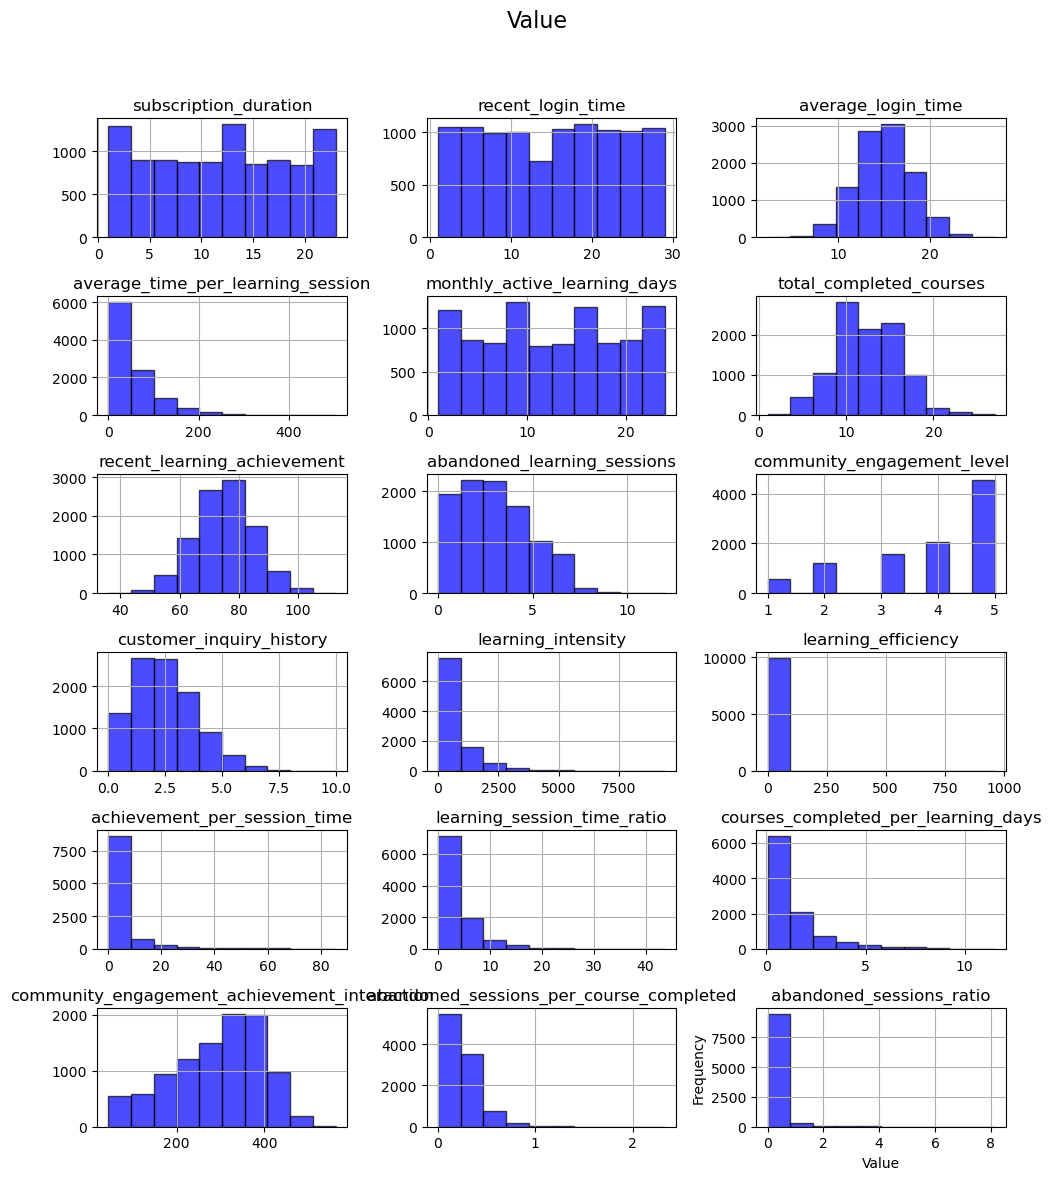

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_cols에 있는 변수 중 train 데이터프레임에 없는 변수 확인
missing_vars = set(numeric_cols) - set(train.columns)

# 누락된 변수들을 제외한 변수들만 선택
selected_numeric_train = train[numeric_cols + list(missing_vars)]

# 히스토그램 그리기
selected_numeric_train.hist(alpha=0.7, color='blue', edgecolor='k', layout=(6, 3), figsize=(10, 12))

plt.suptitle('Value', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [19]:
#원 핫 인코딩
train_transfered['subscription_type'] = train_transfered['subscription_type'].apply(lambda x: 1 if x=='Premium' or x ==1 else 0)
test_transfered['subscription_type'] = test_transfered['subscription_type'].apply(lambda x: 1 if x == 'Premium' or x == 1 else 0)
train_transfered['subscription_type']
test_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,customer_inquiry_history,payment_pattern,learning_intensity,learning_efficiency,achievement_per_session_time,learning_session_time_ratio,courses_completed_per_learning_days,community_engagement_achievement_interaction,abandoned_sessions_per_course_completed,abandoned_sessions_ratio
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,...,2,7,133.897619,2.128492,10.199090,0.578922,0.750000,410.372787,0.187500,0.372798
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,...,4,4,245.833273,0.650848,3.148380,1.701434,1.454545,161.092081,0.235294,0.156352
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,...,1,3,15.368542,11.126625,27.211009,0.087354,1.900000,368.384786,0.250000,1.846643
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,...,1,5,256.696670,0.280487,2.827633,1.487237,0.461538,253.258539,0.000000,0.000000
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,...,1,3,145.015898,0.827495,2.922554,1.403054,1.666667,223.598588,0.062500,0.052282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,...,1,6,1805.020450,0.232684,0.773166,6.982951,1.000000,352.760783,0.181818,0.043835
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,...,3,5,183.704478,0.685884,6.028915,0.761891,0.368421,135.117690,0.250000,0.178479
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,...,1,0,447.629186,0.442330,4.183020,1.128070,0.391304,178.588015,0.500000,0.234227
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,...,2,5,2034.782237,0.063889,0.521950,9.340019,0.714286,411.091949,0.181818,0.012697


In [20]:
#라벨 인코딩
def transfer_level_data(x):
    if type(x) == int:
        return x 
    elif x == 'High':
        return 3
    elif x == 'Medium':
        return 2
    else:
        return 1
        re# 함수를 작성해 보세요.

train_transfered['preferred_difficulty_level'] = train_transfered['preferred_difficulty_level'].apply(transfer_level_data)
test_transfered['preferred_difficulty_level'] = test_transfered['preferred_difficulty_level'].apply(transfer_level_data)
train_transfered['preferred_difficulty_level']

0       2
1       2
2       1
3       2
4       3
       ..
5641    3
5642    1
5643    3
5644    1
5645    2
Name: preferred_difficulty_level, Length: 5646, dtype: int64

In [21]:
#payment_pattern'피처를 OneHotEncoder를 이용해 수치형 데이터로 변환해 봅시다.

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(train_transfered[['payment_pattern']])

# 원핫 인코딩된 결과를 데이터프레임으로 변환

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['payment_pattern']))

train_transfered = train_transfered.drop(columns='payment_pattern')
train_transfered = pd.concat([train_transfered, encoded_df], axis=1)

encoded = encoder.transform(test_transfered[['payment_pattern']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['payment_pattern']))

test_transfered = test_transfered.drop(columns='payment_pattern')
test_transfered = pd.concat([test_transfered, encoded_df], axis=1)

train_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,abandoned_sessions_per_course_completed,abandoned_sessions_ratio,payment_pattern_0,payment_pattern_1,payment_pattern_2,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7
0,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,...,0.142857,0.027157,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,...,0.200000,0.131726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,...,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,...,0.181818,0.063003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,...,0.222222,0.057087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,6ab018ed,12,25,12.730692,58.407028,2,8,64.614196,1,3,...,0.111111,0.016833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5642,1d959e91,7,29,16.165190,84.130016,14,14,78.348380,4,5,...,0.266667,0.046987,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5643,9ee4e40c,11,6,11.187836,88.757610,6,9,77.335911,5,4,...,0.500000,0.055706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5644,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,...,0.117647,0.023515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,abandoned_sessions_per_course_completed,abandoned_sessions_ratio,payment_pattern_0,payment_pattern_1,payment_pattern_2,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,...,0.187500,0.372798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,...,0.235294,0.156352,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,...,0.250000,1.846643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,...,0.062500,0.052282,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,...,0.181818,0.043835,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,...,0.250000,0.178479,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,...,0.500000,0.234227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,...,0.181818,0.012697,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
#수치형 변수 변환
import numpy as np

col_list = ['average_time_per_learning_session', 'customer_inquiry_history', 'abandoned_learning_sessions', 'learning_intensity', 
    'learning_efficiency', 'achievement_per_session_time','learning_session_time_ratio',
    'courses_completed_per_learning_days','community_engagement_achievement_interaction',
    'abandoned_sessions_per_course_completed','abandoned_sessions_ratio']

for col in col_list:
    train_transfered[col+'_root'] = train_transfered[col].apply(lambda x: np.sqrt(x))
    test_transfered[col+'_root'] = test_transfered[col].apply(lambda x: np.sqrt(x))
    
    train_transfered[col+'_root3'] = train_transfered[col].apply(lambda x: x ** (1/3))
    test_transfered[col+'_root3'] = test_transfered[col].apply(lambda x: x ** (1/3))

In [24]:
test_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,learning_session_time_ratio_root,learning_session_time_ratio_root3,courses_completed_per_learning_days_root,courses_completed_per_learning_days_root3,community_engagement_achievement_interaction_root,community_engagement_achievement_interaction_root3,abandoned_sessions_per_course_completed_root,abandoned_sessions_per_course_completed_root3,abandoned_sessions_ratio_root,abandoned_sessions_ratio_root3
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,...,0.760869,0.833438,0.866025,0.908560,20.257660,7.431210,0.433013,0.572357,0.610572,0.719711
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,...,1.304390,1.193819,1.206045,1.133033,12.692206,5.441159,0.485071,0.617358,0.395413,0.538726
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,...,0.295557,0.443705,1.378405,1.238562,19.193353,7.168593,0.500000,0.629961,1.358912,1.226858
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,...,1.219523,1.141458,0.679366,0.772804,15.914099,6.326857,0.000000,0.000000,0.000000,0.000000
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,...,1.184506,1.119502,1.290994,1.185631,14.953213,6.069548,0.250000,0.396850,0.228653,0.373925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,...,2.642527,1.911377,1.000000,1.000000,18.781927,7.065780,0.426401,0.566516,0.209368,0.352593
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,...,0.872864,0.913337,0.606977,0.716883,11.624013,5.131418,0.500000,0.629961,0.422468,0.563027
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,...,1.062106,1.040987,0.625543,0.731428,13.363683,5.631414,0.707107,0.793701,0.483970,0.616424
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,...,3.056144,2.105956,0.845154,0.893904,20.275403,7.435548,0.426401,0.566516,0.112679,0.233290


In [25]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [
    'subscription_duration', 'recent_login_time',
    'average_login_time', 'average_time_per_learning_session',
    'monthly_active_learning_days', 'total_completed_courses',
    'recent_learning_achievement', 'abandoned_learning_sessions',
    'community_engagement_level', 'customer_inquiry_history', 'learning_intensity', 
    'learning_efficiency', 'achievement_per_session_time','learning_session_time_ratio',
    'courses_completed_per_learning_days','community_engagement_achievement_interaction',
    'abandoned_sessions_per_course_completed','abandoned_sessions_ratio'
]

for col in numeric_cols:
    scaler = MinMaxScaler()
    train_transfered[col] = scaler.fit_transform(train_transfered[col].values.reshape(-1, 1))
    test_transfered[col] = scaler.transform(test_transfered[col].values.reshape(-1, 1))
    
train_transfered

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,...,learning_session_time_ratio_root,learning_session_time_ratio_root3,courses_completed_per_learning_days_root,courses_completed_per_learning_days_root3,community_engagement_achievement_interaction_root,community_engagement_achievement_interaction_root3,abandoned_sessions_per_course_completed_root,abandoned_sessions_per_course_completed_root3,abandoned_sessions_ratio_root,abandoned_sessions_ratio_root3
0,a0a60abb,0.681818,0.607143,0.718459,0.417857,0.652174,0.526316,0.916848,0.285714,0.50,...,1.932459,1.551459,0.874475,0.914460,17.108535,6.639599,0.377964,0.522758,0.164794,0.300580
1,b9f171ae,0.954545,0.000000,0.575622,0.095526,0.521739,0.578947,0.856709,0.428571,0.75,...,1.125304,1.081882,1.000000,1.000000,19.427688,7.226823,0.447214,0.584804,0.362941,0.508812
2,5dc0ba8b,0.000000,0.642857,0.666298,0.227854,0.782609,0.789474,0.403016,0.000000,0.50,...,1.513265,1.318085,0.948683,0.965489,14.507229,5.948256,0.000000,0.000000,0.000000,0.000000
3,65c83654,0.136364,0.142857,0.904276,0.152360,0.782609,0.368421,0.623525,0.285714,0.75,...,1.171787,1.111474,0.707107,0.793701,18.101702,6.894132,0.426401,0.566516,0.251005,0.397913
4,b7586b82,0.136364,0.107143,0.643864,0.173206,0.869565,0.263158,0.482071,0.285714,0.75,...,1.364711,1.230346,0.603023,0.713766,17.247728,6.675563,0.471405,0.605707,0.238929,0.385046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,6ab018ed,0.500000,0.857143,0.356461,0.327636,0.043478,0.263158,0.299196,0.142857,0.50,...,2.062464,1.620283,1.632993,1.386723,13.922736,5.787394,0.333333,0.480750,0.129742,0.256284
5642,1d959e91,0.272727,1.000000,0.573722,0.490621,0.565217,0.578947,0.556620,0.571429,1.00,...,2.213865,1.698638,0.966092,0.977265,19.792471,7.317005,0.516398,0.643660,0.216765,0.360849
5643,9ee4e40c,0.454545,0.178571,0.258862,0.519943,0.217391,0.315789,0.537643,0.714286,0.75,...,2.698606,1.938324,1.133893,1.087380,17.588168,6.763120,0.707107,0.793701,0.236020,0.381915
5644,ae6b76bc,0.954545,1.000000,0.482783,0.490137,0.739130,0.684211,0.305805,0.285714,1.00,...,2.311780,1.748361,0.917663,0.944326,18.023152,6.874174,0.342997,0.489997,0.153345,0.286492


C:\Users\taeho\AppData\Local\Temp\ipykernel_26644\411694878.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


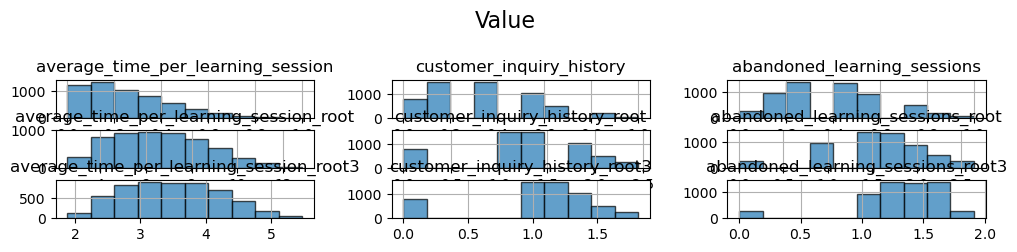

In [26]:
import matplotlib.pyplot as plt

numeric_train = train_transfered[[
    'average_time_per_learning_session', 'customer_inquiry_history', 'abandoned_learning_sessions',    
    'average_time_per_learning_session_root', 'customer_inquiry_history_root', 'abandoned_learning_sessions_root',
    'average_time_per_learning_session_root3', 'customer_inquiry_history_root3', 'abandoned_learning_sessions_root3',
    
]]


# 여러 열의 히스토그램 그리기
numeric_train.hist(alpha=0.7, edgecolor='k', layout=(11, 3), figsize=(12, 7))

# 그래프 제목과 축 레이블 설정
plt.suptitle('Value', fontsize=16)
plt.xlabel('Value')
plt.ylabel('frequency')

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 보여주기
plt.show()

C:\Users\taeho\AppData\Local\Temp\ipykernel_26644\3999588990.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


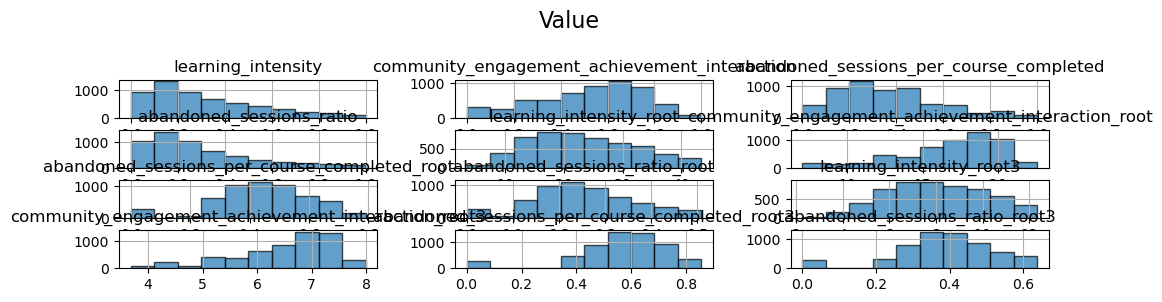

In [27]:
import matplotlib.pyplot as plt

numeric_train =train_transfered[['learning_intensity', 
   'community_engagement_achievement_interaction', 'abandoned_sessions_per_course_completed','abandoned_sessions_ratio',
   'learning_intensity_root','community_engagement_achievement_interaction_root',
    'abandoned_sessions_per_course_completed_root','abandoned_sessions_ratio_root','learning_intensity_root3', 
   'community_engagement_achievement_interaction_root3',
    'abandoned_sessions_per_course_completed_root3','abandoned_sessions_ratio_root3']]

# 여러 열의 히스토그램 그리기
numeric_train.hist(alpha=0.7, edgecolor='k', layout=(11, 3), figsize=(12, 7))

# 그래프 제목과 축 레이블 설정
plt.suptitle('Value', fontsize=16)
plt.xlabel('Value')
plt.ylabel('frequency')

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 보여주기
plt.show()

#'learning intensity', 'learning_intensity_root3', 'community_engagement_achievement_interaction_root', 
#'community_engagement_achievement_interaction_root3', 'abandoned_sessions_per_course_completed',abandoned_sessions_per_course_completed_root3'
#'abandoned_sessions_ratio','abandoned_sessions_ratio_root3' 변수들을 drop해야 된다.


C:\Users\taeho\AppData\Local\Temp\ipykernel_26644\1842802176.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


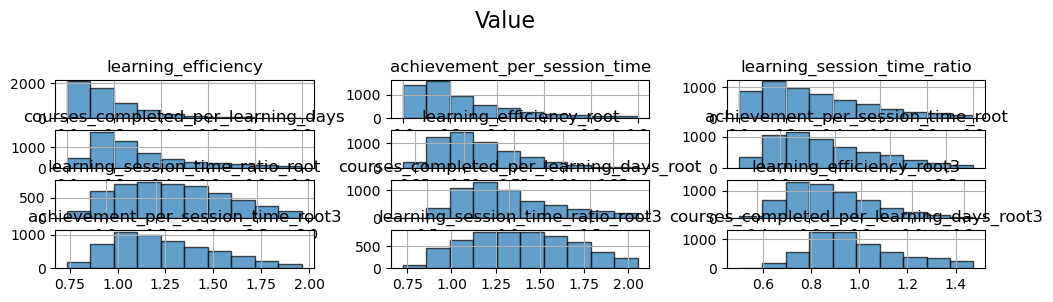

In [28]:
import matplotlib.pyplot as plt

numeric_train=train_transfered[[ 'learning_efficiency', 'achievement_per_session_time','learning_session_time_ratio',
    'courses_completed_per_learning_days', 'learning_efficiency_root', 'achievement_per_session_time_root','learning_session_time_ratio_root',
    'courses_completed_per_learning_days_root', 'learning_efficiency_root3', 'achievement_per_session_time_root3','learning_session_time_ratio_root3',
    'courses_completed_per_learning_days_root3']]


# 여러 열의 히스토그램 그리기
numeric_train.hist(alpha=0.7, edgecolor='k', layout=(11, 3), figsize=(12, 7))

# 그래프 제목과 축 레이블 설정
plt.suptitle('Value', fontsize=16)
plt.xlabel('Value')
plt.ylabel('frequency')

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 보여주기
plt.show()

#'learning_efficiency','learning_efficiency_root','achievement_per_session_time','achievement_per_session_time_root'
# 'learning_session_time_ratio','learning_session_time_ratio_root', 'courses_completed_per_learning_days',courses_completed_per_learning_days_root3',

In [29]:
#필요한 데이터만 정리

drop_columns = [
    'user_id','average_time_per_learning_session', 'customer_inquiry_history', 'abandoned_learning_sessions',
    'average_time_per_learning_session_root',
    'customer_inquiry_history_root3', 'abandoned_learning_sessions_root3','learning_intensity', 'learning_intensity_root3', 'community_engagement_achievement_interaction_root', 
'community_engagement_achievement_interaction_root3', 'abandoned_sessions_per_course_completed','abandoned_sessions_per_course_completed_root3',
'abandoned_sessions_ratio','abandoned_sessions_ratio_root3','learning_efficiency','learning_efficiency_root','achievement_per_session_time','achievement_per_session_time_root',
'learning_session_time_ratio','learning_session_time_ratio_root', 'courses_completed_per_learning_days','courses_completed_per_learning_days_root3']

train_transfered = train_transfered.drop(columns=drop_columns)
test_transfered = test_transfered.drop(columns=drop_columns)
train_transfered

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,target,...,average_time_per_learning_session_root3,customer_inquiry_history_root,abandoned_learning_sessions_root,learning_intensity_root,learning_efficiency_root3,achievement_per_session_time_root3,learning_session_time_ratio_root3,courses_completed_per_learning_days_root,abandoned_sessions_per_course_completed_root,abandoned_sessions_ratio_root
0,0.681818,0.607143,0.718459,0.652174,0.526316,0.916848,0.50,2,0,1,...,4.172574,1.000000,1.414214,34.093069,0.563521,1.098293,1.551459,0.874475,0.377964,0.164794
1,0.954545,0.000000,0.575622,0.521739,0.578947,0.856709,0.75,2,1,1,...,2.792432,0.000000,1.732051,16.824637,0.863098,1.606119,1.081882,1.000000,0.447214,0.362941
2,0.000000,0.642857,0.666298,0.782609,0.789474,0.403016,0.50,1,0,1,...,3.494114,1.000000,0.000000,28.469673,0.750045,1.171272,1.318085,0.948683,0.000000,0.000000
3,0.136364,0.142857,0.904276,0.782609,0.368421,0.623525,0.75,2,0,1,...,3.132719,1.732051,1.414214,24.169018,0.687720,1.371632,1.111474,0.707107,0.426401,0.251005
4,0.136364,0.107143,0.643864,0.869565,0.263158,0.482071,0.75,3,0,0,...,3.240697,2.236068,1.414214,26.734210,0.617151,1.285200,1.230346,0.603023,0.471405,0.238929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,0.500000,0.857143,0.356461,0.043478,0.263158,0.299196,0.50,3,0,1,...,3.879910,1.732051,1.000000,10.808055,0.515476,1.028403,1.620283,1.632993,0.333333,0.129742
5642,0.272727,1.000000,0.573722,0.565217,0.578947,0.556620,1.00,1,1,1,...,4.381778,1.000000,2.000000,34.319385,0.550038,0.972708,1.698638,0.966092,0.516398,0.216765
5643,0.454545,0.178571,0.258862,0.217391,0.315789,0.537643,0.75,3,0,1,...,4.460688,1.000000,2.236068,23.076951,0.466315,0.951561,1.938324,1.133893,0.707107,0.236020
5644,0.954545,1.000000,0.482783,0.739130,0.684211,0.305805,1.00,1,1,1,...,4.380450,1.000000,1.414214,38.896839,0.575247,0.914113,1.748361,0.917663,0.342997,0.153345


In [30]:
train_transfered

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,target,...,average_time_per_learning_session_root3,customer_inquiry_history_root,abandoned_learning_sessions_root,learning_intensity_root,learning_efficiency_root3,achievement_per_session_time_root3,learning_session_time_ratio_root3,courses_completed_per_learning_days_root,abandoned_sessions_per_course_completed_root,abandoned_sessions_ratio_root
0,0.681818,0.607143,0.718459,0.652174,0.526316,0.916848,0.50,2,0,1,...,4.172574,1.000000,1.414214,34.093069,0.563521,1.098293,1.551459,0.874475,0.377964,0.164794
1,0.954545,0.000000,0.575622,0.521739,0.578947,0.856709,0.75,2,1,1,...,2.792432,0.000000,1.732051,16.824637,0.863098,1.606119,1.081882,1.000000,0.447214,0.362941
2,0.000000,0.642857,0.666298,0.782609,0.789474,0.403016,0.50,1,0,1,...,3.494114,1.000000,0.000000,28.469673,0.750045,1.171272,1.318085,0.948683,0.000000,0.000000
3,0.136364,0.142857,0.904276,0.782609,0.368421,0.623525,0.75,2,0,1,...,3.132719,1.732051,1.414214,24.169018,0.687720,1.371632,1.111474,0.707107,0.426401,0.251005
4,0.136364,0.107143,0.643864,0.869565,0.263158,0.482071,0.75,3,0,0,...,3.240697,2.236068,1.414214,26.734210,0.617151,1.285200,1.230346,0.603023,0.471405,0.238929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,0.500000,0.857143,0.356461,0.043478,0.263158,0.299196,0.50,3,0,1,...,3.879910,1.732051,1.000000,10.808055,0.515476,1.028403,1.620283,1.632993,0.333333,0.129742
5642,0.272727,1.000000,0.573722,0.565217,0.578947,0.556620,1.00,1,1,1,...,4.381778,1.000000,2.000000,34.319385,0.550038,0.972708,1.698638,0.966092,0.516398,0.216765
5643,0.454545,0.178571,0.258862,0.217391,0.315789,0.537643,0.75,3,0,1,...,4.460688,1.000000,2.236068,23.076951,0.466315,0.951561,1.938324,1.133893,0.707107,0.236020
5644,0.954545,1.000000,0.482783,0.739130,0.684211,0.305805,1.00,1,1,1,...,4.380450,1.000000,1.414214,38.896839,0.575247,0.914113,1.748361,0.917663,0.342997,0.153345


In [31]:
train_min_max_x = train_transfered.drop(columns='target')
train_min_max_y = train_transfered['target']



In [32]:
test_min_max = test_transfered.copy()
test_min_max

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,community_engagement_achievement_interaction,...,average_time_per_learning_session_root3,customer_inquiry_history_root,abandoned_learning_sessions_root,learning_intensity_root,learning_efficiency_root3,achievement_per_session_time_root3,learning_session_time_ratio_root3,courses_completed_per_learning_days_root,abandoned_sessions_per_course_completed_root,abandoned_sessions_ratio_root
0,0.363636,0.500000,0.257927,0.782609,0.631579,0.626461,1.00,1,1,0.783417,...,1.917225,1.414214,1.732051,11.571414,1.286345,2.168638,0.833438,0.866025,0.433013,0.610572
1,0.454545,0.250000,0.401874,0.391304,0.684211,0.597812,0.25,1,0,0.241595,...,2.907682,2.000000,2.000000,15.679071,0.866615,1.465646,1.193819,1.206045,0.485071,0.395413
2,0.454545,0.964286,0.724467,0.347826,0.842105,0.469062,1.00,1,1,0.692154,...,1.195263,1.000000,2.236068,3.920273,2.232481,3.007795,0.443705,1.378405,0.500000,1.358912
3,0.590909,0.571429,0.397744,0.478261,0.157895,0.274837,0.75,3,1,0.441923,...,2.775959,1.000000,0.000000,16.021756,0.654592,1.414081,1.141458,0.679366,0.000000,0.000000
4,0.818182,0.178571,0.305156,0.304348,0.631579,0.135856,0.75,2,0,0.377456,...,2.626890,1.000000,1.000000,12.042255,0.938833,1.429730,1.119502,1.290994,0.250000,0.228653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.409091,0.821429,0.305461,0.826087,0.947368,0.410493,1.00,2,1,0.658195,...,4.485567,1.000000,2.000000,42.485532,0.615067,0.917820,1.911377,1.000000,0.426401,0.209368
9996,0.636364,0.892857,0.335248,0.739130,0.210526,0.354388,0.25,2,0,0.185139,...,2.169114,1.732051,1.414214,13.553763,0.881895,1.820035,0.913337,0.606977,0.500000,0.422468
9997,0.227273,0.428571,0.628859,0.913043,0.315789,0.761778,0.25,2,0,0.279623,...,2.730016,1.000000,2.236068,21.157249,0.761931,1.611251,1.040987,0.625543,0.707107,0.483970
9998,0.772727,0.285714,0.547975,0.521739,0.368421,0.629157,1.00,1,1,0.784980,...,5.389207,1.414214,1.414214,45.108561,0.399768,0.805149,2.105956,0.845154,0.426401,0.112679


In [33]:
#다항식 변환
from sklearn.preprocessing import PolynomialFeatures

# 2차 다항식 특성 변환
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train_min_max_x)
X_test_poly = poly.transform(test_min_max)

feature_names = poly.get_feature_names_out()
train_poly_x = pd.DataFrame(X_train_poly, columns=feature_names)


In [34]:
test_poly = pd.DataFrame(X_test_poly, columns=feature_names)
test_poly

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,community_engagement_achievement_interaction,...,learning_session_time_ratio_root3^2,learning_session_time_ratio_root3 courses_completed_per_learning_days_root,learning_session_time_ratio_root3 abandoned_sessions_per_course_completed_root,learning_session_time_ratio_root3 abandoned_sessions_ratio_root,courses_completed_per_learning_days_root^2,courses_completed_per_learning_days_root abandoned_sessions_per_course_completed_root,courses_completed_per_learning_days_root abandoned_sessions_ratio_root,abandoned_sessions_per_course_completed_root^2,abandoned_sessions_per_course_completed_root abandoned_sessions_ratio_root,abandoned_sessions_ratio_root^2
0,0.363636,0.500000,0.257927,0.782609,0.631579,0.626461,1.00,1.0,1.0,0.783417,...,0.694619,0.721778,0.360889,0.508874,0.750000,0.375000,0.528771,0.187500,0.264386,0.372798
1,0.454545,0.250000,0.401874,0.391304,0.684211,0.597812,0.25,1.0,0.0,0.241595,...,1.425203,1.439800,0.579087,0.472052,1.454545,0.585018,0.476887,0.235294,0.191804,0.156352
2,0.454545,0.964286,0.724467,0.347826,0.842105,0.469062,1.00,1.0,1.0,0.692154,...,0.196874,0.611605,0.221853,0.602956,1.900000,0.689202,1.873132,0.250000,0.679456,1.846643
3,0.590909,0.571429,0.397744,0.478261,0.157895,0.274837,0.75,3.0,1.0,0.441923,...,1.302927,0.775468,0.000000,0.000000,0.461538,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.818182,0.178571,0.305156,0.304348,0.631579,0.135856,0.75,2.0,0.0,0.377456,...,1.253284,1.445271,0.279875,0.255977,1.666667,0.322749,0.295190,0.062500,0.057163,0.052282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.409091,0.821429,0.305461,0.826087,0.947368,0.410493,1.00,2.0,1.0,0.658195,...,3.653362,1.911377,0.815014,0.400182,1.000000,0.426401,0.209368,0.181818,0.089275,0.043835
9996,0.636364,0.892857,0.335248,0.739130,0.210526,0.354388,0.25,2.0,0.0,0.185139,...,0.834184,0.554374,0.456668,0.385855,0.368421,0.303488,0.256428,0.250000,0.211234,0.178479
9997,0.227273,0.428571,0.628859,0.913043,0.315789,0.761778,0.25,2.0,0.0,0.279623,...,1.083654,0.651182,0.736089,0.503807,0.391304,0.442326,0.302744,0.500000,0.342219,0.234227
9998,0.772727,0.285714,0.547975,0.521739,0.368421,0.629157,1.00,1.0,1.0,0.784980,...,4.435050,1.779858,0.897983,0.237298,0.714286,0.360375,0.095232,0.181818,0.048047,0.012697


In [35]:
import pprint

print('피처 개수:', len(train_poly_x.columns))
pprint.pprint(train_poly_x.columns[:50].tolist())
train_poly_x.head()

피처 개수: 434
['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'community_engagement_level',
 'preferred_difficulty_level',
 'subscription_type',
 'community_engagement_achievement_interaction',
 'payment_pattern_0',
 'payment_pattern_1',
 'payment_pattern_2',
 'payment_pattern_3',
 'payment_pattern_4',
 'payment_pattern_5',
 'payment_pattern_6',
 'payment_pattern_7',
 'average_time_per_learning_session_root3',
 'customer_inquiry_history_root',
 'abandoned_learning_sessions_root',
 'learning_intensity_root',
 'learning_efficiency_root3',
 'achievement_per_session_time_root3',
 'learning_session_time_ratio_root3',
 'courses_completed_per_learning_days_root',
 'abandoned_sessions_per_course_completed_root',
 'abandoned_sessions_ratio_root',
 'subscription_duration^2',
 'subscription_duration recent_login_time',
 'subscription_duration average_login_time',
 'subscription_durati

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,community_engagement_achievement_interaction,...,learning_session_time_ratio_root3^2,learning_session_time_ratio_root3 courses_completed_per_learning_days_root,learning_session_time_ratio_root3 abandoned_sessions_per_course_completed_root,learning_session_time_ratio_root3 abandoned_sessions_ratio_root,courses_completed_per_learning_days_root^2,courses_completed_per_learning_days_root abandoned_sessions_per_course_completed_root,courses_completed_per_learning_days_root abandoned_sessions_ratio_root,abandoned_sessions_per_course_completed_root^2,abandoned_sessions_per_course_completed_root abandoned_sessions_ratio_root,abandoned_sessions_ratio_root^2
0,0.681818,0.607143,0.718459,0.652174,0.526316,0.916848,0.50,2.0,0.0,0.527655,...,2.407024,1.356711,0.586396,0.255670,0.764706,0.330520,0.144108,0.142857,0.062286,0.027157
1,0.954545,0.000000,0.575622,0.521739,0.578947,0.856709,0.75,2.0,1.0,0.711825,...,1.170469,1.081882,0.483832,0.392660,1.000000,0.447214,0.362941,0.200000,0.162312,0.131726
2,0.000000,0.642857,0.666298,0.782609,0.789474,0.403016,0.50,1.0,0.0,0.348898,...,1.737347,1.250445,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.136364,0.142857,0.904276,0.782609,0.368421,0.623525,0.75,2.0,0.0,0.603662,...,1.235374,0.785931,0.473934,0.278985,0.500000,0.301511,0.177487,0.181818,0.107029,0.063003
4,0.136364,0.107143,0.643864,0.869565,0.263158,0.482071,0.75,3.0,0.0,0.538049,...,1.513751,0.741926,0.579991,0.293965,0.363636,0.284268,0.144080,0.222222,0.112632,0.057087


In [36]:
#상호작용 특성
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(train_min_max_x)
X_test_poly = poly.transform(test_min_max)

feature_names = poly.get_feature_names_out()
train_poly_x = pd.DataFrame(X_train_poly, columns=feature_names)
test_poly = pd.DataFrame(X_test_poly, columns=feature_names)

print('피처 개수:', len(train_poly_x.columns))
print('피처 이름 50개 출력')
pprint.pprint(train_poly_x.columns[:50].tolist())

train_poly_x.head()


피처 개수: 406
피처 이름 50개 출력
['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'community_engagement_level',
 'preferred_difficulty_level',
 'subscription_type',
 'community_engagement_achievement_interaction',
 'payment_pattern_0',
 'payment_pattern_1',
 'payment_pattern_2',
 'payment_pattern_3',
 'payment_pattern_4',
 'payment_pattern_5',
 'payment_pattern_6',
 'payment_pattern_7',
 'average_time_per_learning_session_root3',
 'customer_inquiry_history_root',
 'abandoned_learning_sessions_root',
 'learning_intensity_root',
 'learning_efficiency_root3',
 'achievement_per_session_time_root3',
 'learning_session_time_ratio_root3',
 'courses_completed_per_learning_days_root',
 'abandoned_sessions_per_course_completed_root',
 'abandoned_sessions_ratio_root',
 'subscription_duration recent_login_time',
 'subscription_duration average_login_time',
 'subscription_duration monthly_acti

,subscription_duration,recent_login_time,average_login_time,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,preferred_difficulty_level,subscription_type,community_engagement_achievement_interaction,...,achievement_per_session_time_root3 learning_session_time_ratio_root3,achievement_per_session_time_root3 courses_completed_per_learning_days_root,achievement_per_session_time_root3 abandoned_sessions_per_course_completed_root,achievement_per_session_time_root3 abandoned_sessions_ratio_root,learning_session_time_ratio_root3 courses_completed_per_learning_days_root,learning_session_time_ratio_root3 abandoned_sessions_per_course_completed_root,learning_session_time_ratio_root3 abandoned_sessions_ratio_root,courses_completed_per_learning_days_root abandoned_sessions_per_course_completed_root,courses_completed_per_learning_days_root abandoned_sessions_ratio_root,abandoned_sessions_per_course_completed_root abandoned_sessions_ratio_root
0,0.681818,0.607143,0.718459,0.652174,0.526316,0.916848,0.50,2.0,0.0,0.527655,...,1.703956,0.960429,0.415116,0.180992,1.356711,0.586396,0.255670,0.330520,0.144108,0.062286
1,0.954545,0.000000,0.575622,0.521739,0.578947,0.856709,0.75,2.0,1.0,0.711825,...,1.737632,1.606119,0.718278,0.582927,1.081882,0.483832,0.392660,0.447214,0.362941,0.162312
2,0.000000,0.642857,0.666298,0.782609,0.789474,0.403016,0.50,1.0,0.0,0.348898,...,1.543835,1.111166,0.000000,0.000000,1.250445,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.136364,0.142857,0.904276,0.782609,0.368421,0.623525,0.75,2.0,0.0,0.603662,...,1.524533,0.969891,0.584866,0.344286,0.785931,0.473934,0.278985,0.301511,0.177487,0.107029
4,0.136364,0.107143,0.643864,0.869565,0.263158,0.482071,0.75,3.0,0.0,0.538049,...,1.581240,0.775005,0.605849,0.307072,0.741926,0.579991,0.293965,0.284268,0.144080,0.112632


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 표준화
scaler = StandardScaler()
train_scaled_x = scaler.fit_transform(train_poly_x)
test_scaled = scaler.transform(test_poly)

# PCA 적용
pca = PCA(n_components=25)
train_pca_x = pca.fit_transform(train_scaled_x)
test_pca = pca.transform(test_scaled)

# 변환된 데이터 확인
print("Transformed shape:", train_pca_x.shape)
print(train_pca_x)

Transformed shape: (5646, 25)
[[-3.41546113e-01  5.02735576e+00 -4.70353592e+00 ... -2.54150161e-01
  -1.35225633e-01  2.31510522e-02]
 [ 5.89223626e+00 -5.11893440e+00  2.82688371e+00 ...  6.31994876e-03
  -1.29383705e-01  1.19245547e+00]
 [-7.33758833e+00  9.01361166e+00  7.10084008e+00 ...  3.94217148e-02
  -1.39888460e-01  2.06298125e-01]
 ...
 [-2.31574647e+00  5.05843480e-01 -3.23817867e+00 ... -1.15582578e-01
  -1.94790684e-01  2.62898169e-01]
 [ 8.18302371e+00  9.14447140e+00 -7.30464559e-02 ... -1.84837981e-01
  -4.56601116e-01  1.95563073e+00]
 [-4.63759725e+00 -1.44311377e+00 -1.61062407e+00 ... -3.25403599e-02
   3.21450794e-01 -1.11060893e+00]]


In [38]:
!pip install imblearn

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

train_smote_x, train_smote_y = smote.fit_resample(train_pca_x, train_min_max_y)

In [40]:
train_smote_x

array([[-3.41546113e-01,  5.02735576e+00, -4.70353592e+00, ...,
        -2.54150161e-01, -1.35225633e-01,  2.31510522e-02],
       [ 5.89223626e+00, -5.11893440e+00,  2.82688371e+00, ...,
         6.31994876e-03, -1.29383705e-01,  1.19245547e+00],
       [-7.33758833e+00,  9.01361166e+00,  7.10084008e+00, ...,
         3.94217148e-02, -1.39888460e-01,  2.06298125e-01],
       ...,
       [-6.64095478e+00, -4.58825742e+00, -1.21462004e+00, ...,
         6.32870411e-03,  3.69644340e-01, -1.29463037e+00],
       [ 3.73239975e+00,  7.60451649e+00,  2.09030504e+00, ...,
        -1.49046194e+00,  1.20341451e+00, -5.89023555e-01],
       [-2.84157647e+00, -5.04372689e+00, -2.83940362e+00, ...,
         3.27466564e-03,  3.86923938e-01, -9.26576844e-01]])

In [41]:
# 데이터 정리
import re
from sklearn.model_selection import train_test_split

# 학습 데이터, 검증 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(train_smote_x, train_smote_y, test_size=0.02, random_state=42)



In [42]:
# 변수 이름 변경
test_x = test_pca
test_x

array([[ 9.96999469e+00, -1.37805906e+01,  3.55631206e+00, ...,
        -3.18201598e-01,  2.94602441e-01,  8.58551841e-01],
       [-3.40951105e+00, -6.69466438e+00,  3.80716807e-01, ...,
        -3.00653677e-01, -4.31820084e-02,  1.88050933e-01],
       [ 2.11867569e+01, -4.52754950e+01,  6.42356179e+00, ...,
        -2.85730108e+00,  4.00792893e+00, -2.82804032e+00],
       ...,
       [-3.69316198e+00, -8.13156365e+00, -9.21089846e+00, ...,
         1.34258358e+00, -5.06432967e-01,  3.91466160e-01],
       [ 6.78822914e+00,  1.18985554e+01, -3.20957653e+00, ...,
        -2.48607942e-01, -1.72770584e+00, -1.34033593e+00],
       [-4.69398330e+00,  2.91151036e-02,  3.52267415e+00, ...,
         7.54904099e-01, -6.90054636e-01,  3.11942380e-01]])

In [43]:
# 학습 결과 점수
result_score = pd.DataFrame(columns=['Model', 'Score'])

In [44]:
import optuna

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the objective function for XGBoost
def objective_xgboost(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Optuna study for XGBoost
study_xgboost = optuna.create_study(direction='maximize')
study_xgboost.optimize(objective_xgboost, n_trials=10)

# Define the objective function for CatBoost
def objective_catboost(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    depth = trial.suggest_int('depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    model = CatBoostClassifier(
        learning_rate=learning_rate,
        depth=depth,
        subsample=subsample,
        random_state=42,
        silent=True
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Optuna study for CatBoost
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective_catboost, n_trials=10)

# Define the objective function for LightGBM
def objective_lightgbm(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    model = LGBMClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Optuna study for LightGBM
study_lightgbm = optuna.create_study(direction='maximize')
study_lightgbm.optimize(objective_lightgbm, n_trials=10)

# Create models with best parameters
xgboost_model = XGBClassifier(**study_xgboost.best_params, random_state=42)
catboost_model = CatBoostClassifier(**study_catboost.best_params, random_state=42, silent=True)
lightgbm_model = LGBMClassifier(**study_lightgbm.best_params, random_state=42)




[I 2023-12-10 23:12:15,259] A new study created in memory with name: no-name-1d66b415-39df-481b-add1-17c98f807249
[I 2023-12-10 23:12:16,326] Trial 0 finished with value: 0.5808823529411765 and parameters: {'learning_rate': 0.3666080613912187, 'max_depth': 5, 'subsample': 0.5423616792043545, 'colsample_bytree': 0.5024113289269763}. Best is trial 0 with value: 0.5808823529411765.
[I 2023-12-10 23:12:16,432] Trial 1 finished with value: 0.5514705882352942 and parameters: {'learning_rate': 0.2631016851743083, 'max_depth': 4, 'subsample': 0.5632509310899214, 'colsample_bytree': 0.7424518709814036}. Best is trial 0 with value: 0.5808823529411765.
[I 2023-12-10 23:12:16,981] Trial 2 finished with value: 0.6029411764705882 and parameters: {'learning_rate': 0.3898557411117655, 'max_depth': 10, 'subsample': 0.7153971187493853, 'colsample_bytree': 0.9917658595009606}. Best is trial 2 with value: 0.6029411764705882.
[I 2023-12-10 23:12:17,120] Trial 3 finished with value: 0.5441176470588235 and p

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-12-10 23:13:52,934] Trial 0 finished with value: 0.6470588235294118 and parameters: {'learning_rate': 0.4783522444079409, 'max_depth': 9, 'subsample': 0.9982866633123655}. Best is trial 0 with value: 0.6470588235294118.
[I 2023-12-10 23:13:53,089] Trial 1 finished with value: 0.5514705882352942 and parameters: {'learning_rate': 0.06763139343166394, 'max_depth': 5, 'subsample': 0.5568265294587227}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-12-10 23:13:53,188] Trial 2 finished with value: 0.49264705882352944 and parameters: {'learning_rate': 0.0284444891040999, 'max_depth': 4, 'subsample': 0.6780075457223833}. Best is trial 0 with value: 0.6470588235294118.
[I 2023-12-10 23:13:53,333] Trial 3 finished with value: 0.5661764705882353 and parameters: {'learning_rate': 0.15946240739216225, 'max_depth': 5, 'subsample': 0.855297851100861}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-12-10 23:13:53,597] Trial 4 finished with value: 0.5882352941176471 and parameters: {'learning_rate': 0.07090985586682697, 'max_depth': 9, 'subsample': 0.8132316715508241}. Best is trial 0 with value: 0.6470588235294118.
[I 2023-12-10 23:13:53,692] Trial 5 finished with value: 0.5147058823529411 and parameters: {'learning_rate': 0.48084474728992305, 'max_depth': 3, 'subsample': 0.512833601363385}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2023-12-10 23:13:53,958] Trial 6 finished with value: 0.625 and parameters: {'learning_rate': 0.34287950732338063, 'max_depth': 9, 'subsample': 0.505809385669177}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2023-12-10 23:13:54,217] Trial 7 finished with value: 0.6176470588235294 and parameters: {'learning_rate': 0.3140598041795327, 'max_depth': 8, 'subsample': 0.9017857103588378}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

[I 2023-12-10 23:13:54,398] Trial 8 finished with value: 0.5955882352941176 and parameters: {'learning_rate': 0.49171924467845535, 'max_depth': 10, 'subsample': 0.6408698478062905}. Best is trial 0 with value: 0.6470588235294118.
[I 2023-12-10 23:13:54,597] Trial 9 finished with value: 0.6102941176470589 and parameters: {'learning_rate': 0.39760744807879855, 'max_depth': 6, 'subsample': 0.7052860209630316}. Best is trial 0 with value: 0.6470588235294118.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3319, number of negative: 3319
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6638, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [48]:
# Create a StackingClassifier with Logistic Regression as the final estimator
stacking_model = StackingClassifier(
    estimators=[
        ('xgboost', xgboost_model),
        ('catboost', catboost_model),
        ('lightgbm', lightgbm_model)
    ],
    final_estimator=LogisticRegression(),
    stack_method='auto',
    n_jobs=-1
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model on the validation set
y_pred_stacking = stacking_model.predict(X_val)
accuracy_stacking = accuracy_score(y_val, y_pred_stacking)

# Display the accuracy of the stacking model
print(f'Stacking Model Accuracy: {accuracy_stacking}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Stacking Model Accuracy: 0.6397058823529411


In [49]:
pred = stacking_model.predict(test_x)

submission = pd.read_csv('sample_submission1.csv')
submission['target'] = pred

submission.to_csv('submissionstacking.csv', index=False)

#변수 8개를 근거없이 막만든거
# selectformodel인가 여기서 변수의 개수가 안 줄어들고 그대로 남아있는거?



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [101]:
#scale한 후에 pca 적용한 것.